# Prepare and visualize the data for later analysis

In [ ]:
# Do some magic: Config the matplotlib backend as plotting inline in IPython.
%matplotlib inline

# Import statements
from Assignment01_Functions import * 
from IPython.display import display, Image

In [5]:
# Variable declaration
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None # Used to display percentage of download process
subdirectory = './data/'     # Subdirectory where all the data is stored

# Both overgiven variables are used within Assignment01_Functions as global variables.
set_global_variables(last_percent_reported, subdirectory)

## Downloading
From here on the data is split into training and test data. The training data is used to train models. The test data is used to check the accurancy of the models applied later. 

In [4]:
train_filename = maybe_download('notMNIST_large.tar.gz', 247336696, url)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043, url)

Found and verified notMNIST_large.tar.gz
Found and verified notMNIST_small.tar.gz


## Extracting

In [5]:
num_classes = 10          # Number of folders
np.random.seed(133)       # Makes the random numbers predictable

train_folders = maybe_extract("notMNIST_large.tar.gz", num_classes)
test_folders = maybe_extract("notMNIST_small.tar.gz", num_classes)

notMNIST_large already present - Skipping extraction of notMNIST_large.tar.gz.
notMNIST_small already present - Skipping extraction of notMNIST_small.tar.gz.



## Visualizing some of the pictures
Display randomly some images from the training data to get an idea how the pictures within the dataset look like. All pictures look quite similar to the ones list below.

This operation works way faster on the test data. Nevertheless we focus on the training data, because we want to build a model from the training data instead of building a model for the test data.

In [6]:
# Import statements
import os, random
import string

# To store path to images.
random_images = []

for i in range(4):
    
    # Choose randomly a folder and a picture
    folder = random.choice(string.ascii_uppercase[:10])
    directory = subdirectory + '/notMNIST_large/' + folder + '/'
    file = random.choice(os.listdir(directory))

    random_images.append(directory + file)
    
i0 = Image(filename = random_images[0])
i1 = Image(filename = random_images[1])
i2 = Image(filename = random_images[2])
i3 = Image(filename = random_images[3])

display(i0, i1, i2, i3)

# Pickling

In [9]:
image_size = 28           # Pixel width and height.
pixel_depth = 255.0       # Number of levels per pixel.

# Object structure is transferred to binary representation or serializing the object.
train_datasets = maybe_pickle(train_folders, 45000, image_size, pixel_depth)
test_datasets = maybe_pickle(test_folders, 1800, image_size, pixel_depth)

./data/notMNIST_large/A.pickle already present - Skipping pickling.
./data/notMNIST_large/B.pickle already present - Skipping pickling.
./data/notMNIST_large/C.pickle already present - Skipping pickling.
./data/notMNIST_large/D.pickle already present - Skipping pickling.
./data/notMNIST_large/E.pickle already present - Skipping pickling.
./data/notMNIST_large/F.pickle already present - Skipping pickling.
./data/notMNIST_large/G.pickle already present - Skipping pickling.
./data/notMNIST_large/H.pickle already present - Skipping pickling.
./data/notMNIST_large/I.pickle already present - Skipping pickling.
./data/notMNIST_large/J.pickle already present - Skipping pickling.
./data/notMNIST_small/A.pickle already present - Skipping pickling.
./data/notMNIST_small/B.pickle already present - Skipping pickling.
./data/notMNIST_small/C.pickle already present - Skipping pickling.
./data/notMNIST_small/D.pickle already present - Skipping pickling.
./data/notMNIST_small/E.pickle already present -

## Visualize images from pickle-file

The appearance of the picture varies because a colormap was used.

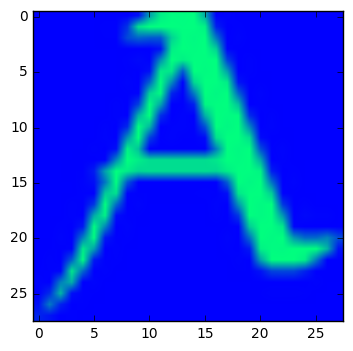

In [10]:
pickle_file = train_datasets[0]  # index 0 should be all As, 1 = all Bs, etc.
with open(pickle_file, 'rb') as f:
    letter_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(letter_set))  # pick a random image index
    sample_image = letter_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    
    # List of available color maps: 
    # http://matplotlib.org/examples/color/colormaps_reference.html
    plt.set_cmap('winter')
    
    plt.imshow(sample_image)  # display it

## Showing that the data is balanced across classes

In [11]:
# TODO

print(len(pickle_file))

30


## Initialize training and test data set

In [12]:
# Define framework data. The size can be choosen smaller if default settings do not fit in 
# your memory.
train_size = 200000
valid_size = 10000
test_size = 10000

# Merge the small pickle files of training and testing data to one large each. 
valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
train_datasets, train_size, image_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size, image_size)

# Print basic information about the data.
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)
print(type(test_dataset))

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)
<class 'numpy.ndarray'>


## Randomize the data

In [9]:
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

## Visualize data after shuffling

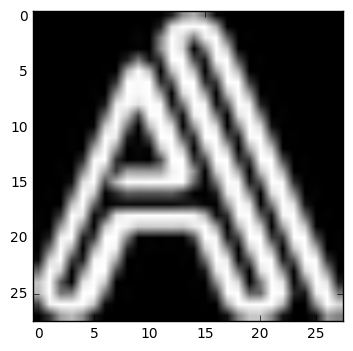

0


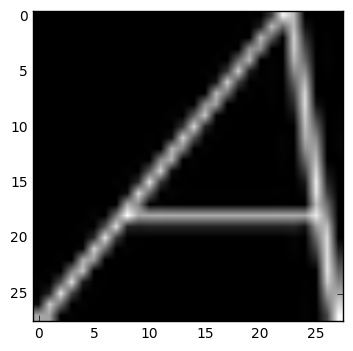

0


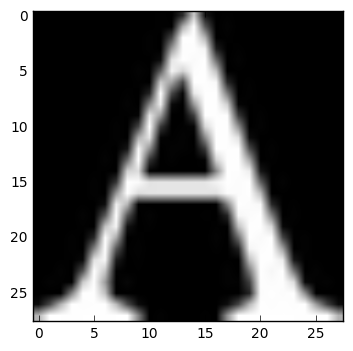

0


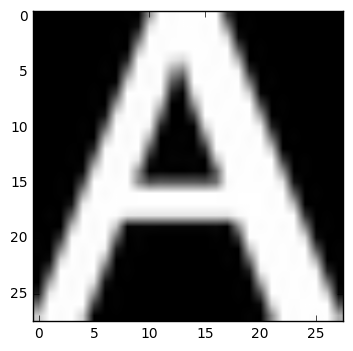

0


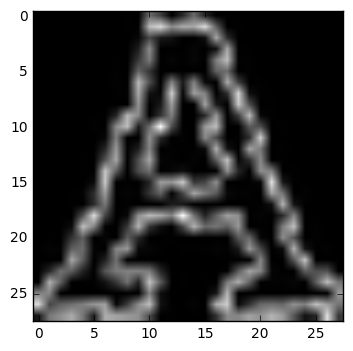

0


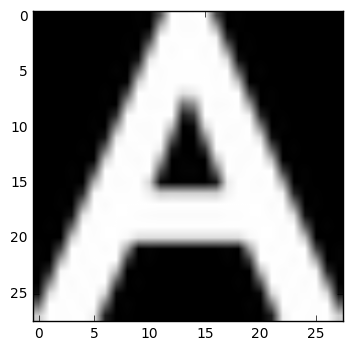

0


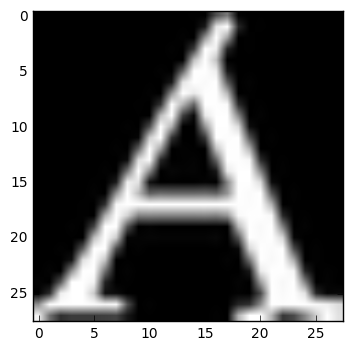

0


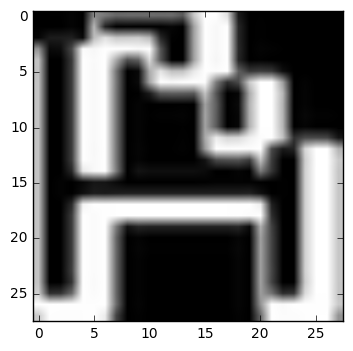

0


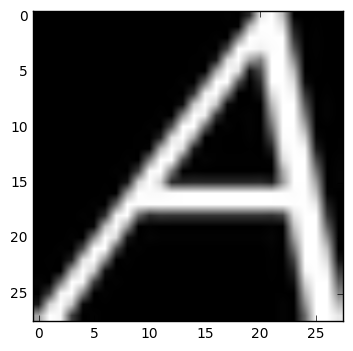

0


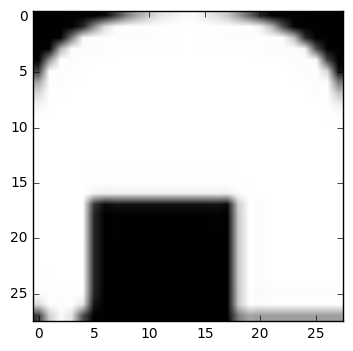

0


In [22]:
for i in range(10):
    plt.imshow(test_dataset[i], cmap = plt.gray())
    plt.show()
    print(test_labels[i])

Be aware of the fact that the number of sets is highly different between test and train data


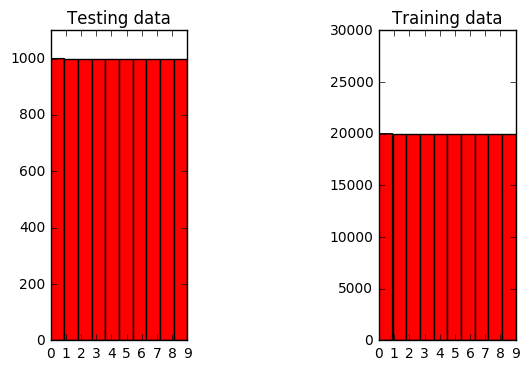

In [96]:
plt.figure(1)

plt.subplot(131)
plt.hist(test_labels, color = 'r')
plt.axis([0,9,0,1100])
plt.title('Testing data')

plt.subplot(133)
plt.hist(train_labels, color = 'r')
plt.axis([0,9,0,30000])
plt.title('Training data')

plt.show()

Be aware that the number of sets is highly different between test and train data.

Train and test data are well equally distributed over the ten classes. The ten classes represent folders containing all pictures of certain letters. The folder named 'A' contains only images of letter 'A'.

## Save pickle-file

In [6]:
pickle_file = subdirectory + 'notMNIST.pickle'  # Pickle target file.

In [42]:
data_to_pickle(pickle_file, train_dataset, train_labels, valid_dataset,valid_labels,
test_dataset, test_labels)

statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

NameError: name 'train_dataset' is not defined

## Check dataset for duplicates

In [39]:
from correlationMap import * 

data = pickle.load(open(pickle_file, 'rb'))

name = 'train_dataset'
data = data[name]

Calculation of ssim took 4.9639 for 200 images. 

Displaying the first three pairs of nearly similar images: 



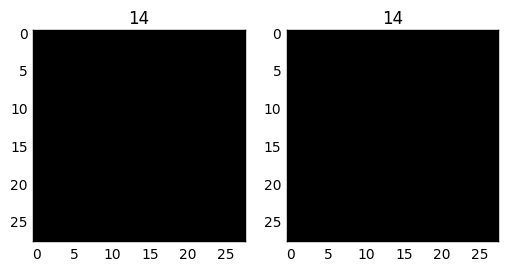

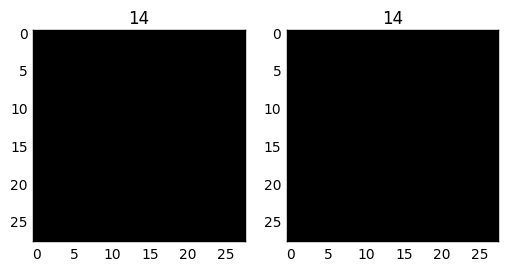

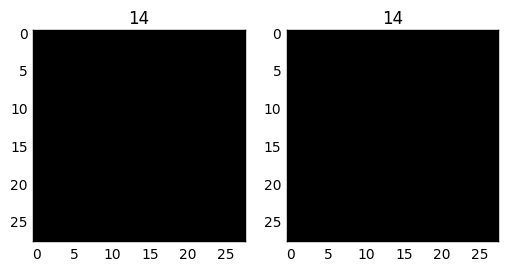

In [41]:
# Set number of values behind comma which is printed out
np.set_printoptions(precision = 3)

# Calculate similar images
similarity_matrix = similarity_of_images(data, 200)

# Save result in similarityMap
display_name = name[0].upper() + name[1:]
similarity_matrix.dump('data/similarityMap' + display_name + '.pickle')

# Get similar images from matrix
similar_images = get_similar_images(similarity_matrix, 0.9)

# Visualize some similar images
visualize_similar_images(similar_images, data)

# TODO title of plots does not fit.